In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price. using the past 60 day stock price.

# Import Packages

In [1]:
# Import Libraries
import datetime as dt
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get APPLE Data

In [31]:
#Get the Stock Data
enddate = dt.datetime.now()
startdate = '2019-09-01'
df = web.DataReader('AAPL', data_source='yahoo', start = startdate, end = enddate)

In [32]:
#Show the data from the data frame
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.594368
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.452774
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.458755
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.453838
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,52.677666
...,...,...,...,...,...,...
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,153.119995
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,151.830002
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,152.509995


In [61]:
#Get the number of rows and columns in the data set
#number of Trading days
df.shape

(507, 6)

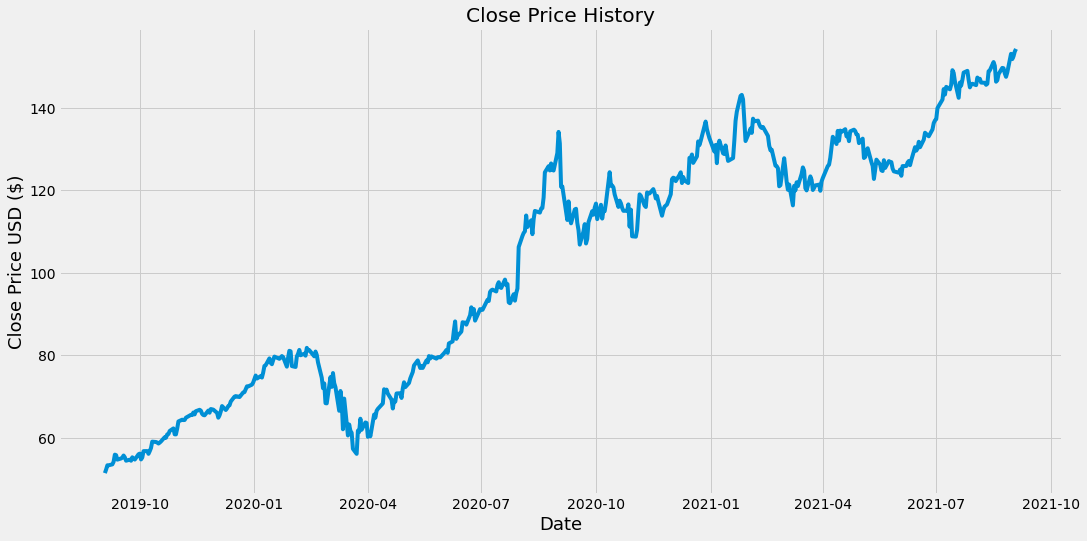

In [34]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [35]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len =math.ceil(len(dataset)*0.8)

In [36]:
training_data_len

406

In [37]:
#Scale the data. Apply preprocessing scaling
scaler = MinMaxScaler(feature_range=(0,1))
# Will hold the dataset that is now Scale
scaled_data = scaler.fit_transform(dataset)
# fit_transformcompute the min and max values used for scaling and transform the data base on 0,1
scaled_data

array([[0.        ],
       [0.00848118],
       [0.01842042],
       [0.0183718 ],
       [0.02058323],
       [0.02673147],
       [0.04347509],
       [0.04226002],
       [0.03171325],
       [0.03450789],
       [0.036452  ],
       [0.0414824 ],
       [0.03708386],
       [0.0292345 ],
       [0.03164035],
       [0.02911299],
       [0.03725395],
       [0.0344836 ],
       [0.03188338],
       [0.04439855],
       [0.04590522],
       [0.03222359],
       [0.03674364],
       [0.05178614],
       [0.05190765],
       [0.04544349],
       [0.05183475],
       [0.05927096],
       [0.0741434 ],
       [0.07331713],
       [0.07198058],
       [0.06967192],
       [0.07188336],
       [0.07462942],
       [0.08459294],
       [0.0832564 ],
       [0.0910814 ],
       [0.09205347],
       [0.09934387],
       [0.1053463 ],
       [0.09134871],
       [0.09127581],
       [0.10464155],
       [0.12179832],
       [0.12588093],
       [0.12498179],
       [0.12524907],
       [0.130

In [38]:
#Create the training data set
#Created the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if (i <= 61):
        print(x_train)
        print(y_train)
       

[array([0.        , 0.00848118, 0.01842042, 0.0183718 , 0.02058323,
       0.02673147, 0.04347509, 0.04226002, 0.03171325, 0.03450789,
       0.036452  , 0.0414824 , 0.03708386, 0.0292345 , 0.03164035,
       0.02911299, 0.03725395, 0.0344836 , 0.03188338, 0.04439855,
       0.04590522, 0.03222359, 0.03674364, 0.05178614, 0.05190765,
       0.04544349, 0.05183475, 0.05927096, 0.0741434 , 0.07331713,
       0.07198058, 0.06967192, 0.07188336, 0.07462942, 0.08459294,
       0.0832564 , 0.0910814 , 0.09205347, 0.09934387, 0.1053463 ,
       0.09134871, 0.09127581, 0.10464155, 0.12179832, 0.12588093,
       0.12498179, 0.12524907, 0.13057107, 0.13229651, 0.13730258,
       0.1367193 , 0.14281896, 0.13837185, 0.14595385, 0.14921022,
       0.14724182, 0.13970839, 0.13684085, 0.13628189, 0.1474362 ])]
[0.14238155388605]
[array([0.        , 0.00848118, 0.01842042, 0.0183718 , 0.02058323,
       0.02673147, 0.04347509, 0.04226002, 0.03171325, 0.03450789,
       0.036452  , 0.0414824 , 0.037083

In [39]:
#Conver the x_train and y_train to numpy arrays, so we can use to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
#Reshape the data, why? LSTM network expects the input to be tri-dimensional in the form of number of 
# examples, number of time steps and number of features and now the dataset is two-dimensional so 
# we need to reshape
x_train.shape
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [41]:
x_train.shape

(346, 60, 1)

In [42]:
#Build the LMST Model architecture
model = Sequential()
#will have 50 neurons 
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
#add Dense layer with 25 neurons
model.add(Dense(25))
model.add(Dense(1))

In [43]:
#Compile the model. the optimizer is used to optimize unto the loss function and the loss function
# measure how well the model did on training
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [44]:
#Train the model. fit is another name for train
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

346/346 [==============================] - 13s 29ms/step - loss: 0.0080


In [45]:
#Create the testing dataset
#Create a new array containing scaled values from index 1888 to 2435
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets for x_test and y_test
x_test = []
# y_test contains all the values that our model wants to predicts
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [46]:
#Convert the data to a numpy array so we can used in our LSTMS model
x_test = np.array(x_test) 

In [47]:
#Reshape the data
#number of samples = x_test.shape[0]
#number of columns = x_test.shape[1]
#number of features = 1 (close price)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
#Get the model predicted price values
predictions = model.predict(x_test)
#unscaling the values to contain the same values as y_test dataset
predictions = scaler.inverse_transform(predictions)

In [49]:
#Get the root mean square error (RMSE)-standard deviasion of the residual to get and idea how well
#your model perform
rmse = np.sqrt(((predictions - y_test)**2).mean())

In [50]:
rmse

8.228929534620255

<ipython-input-51-bd29f0807b02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

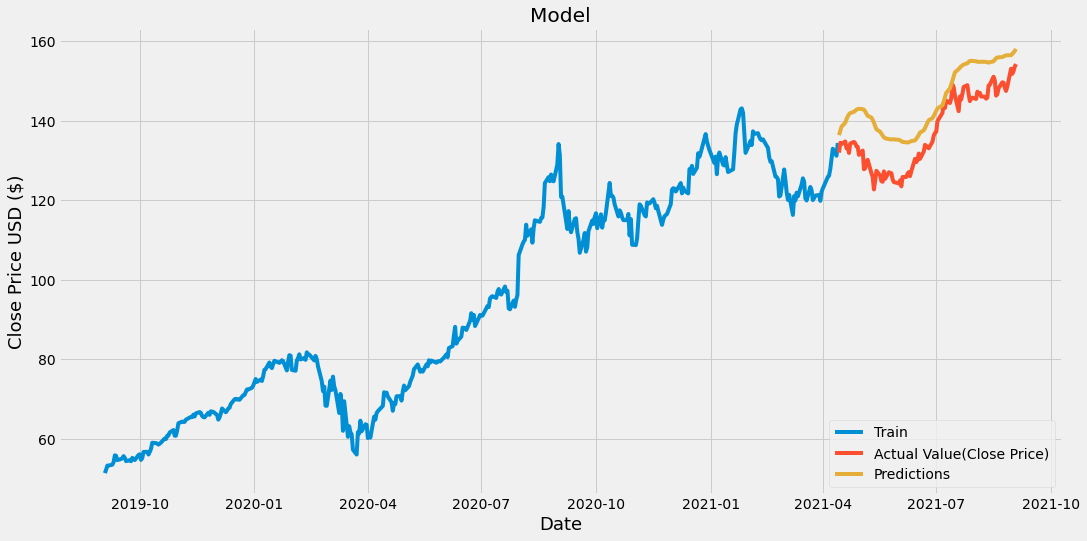

In [51]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value(Close Price)', 'Predictions'], loc='lower right')
plt.show


In [52]:
#Show the Valid and Predicted Prices
valid

,Close,Predictions
Date,,
2021-04-14,132.029999,136.422623
2021-04-15,134.500000,137.483810
2021-04-16,134.160004,138.555954
2021-04-19,134.839996,139.531189
2021-04-20,133.110001,140.433044
...,...,...
2021-08-30,153.119995,156.528992
2021-08-31,151.830002,156.842148
2021-09-01,152.509995,157.194855


In [53]:
#Predict the Closing Price of APPLE
#Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = startdate, end = enddate )
apple_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.594368
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.452774
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.458755
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.453838
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,52.677666
...,...,...,...,...,...,...
2021-08-30,153.490005,148.610001,149.000000,153.119995,90956700.0,153.119995
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,151.830002
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,152.509995


In [54]:
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to numpy array
last_60_days = new_df[-60:].values
#scale the data to be values betwwen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create and empty list
X_test = []
#append the last 60 days
X_test.append(last_60_days_scaled)
#convert the x_test data to set a numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[158.647]]


In [63]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2021-09-07', end = '2021-09-07' )
print(apple_quote2['Close'])

KeyError: 'Date'